In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Standard Scaler

In [ ]:
# reading csv file
athlete_events = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# get the data for summer Olympic
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()


,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,F,18.0,168.0,NaN,Netherlands,1932,Summer,Athletics,Athletics Women's 100 metres,NaN


In [ ]:
summer_sports = summer_data["Sport"].unique()

Football

(3459, 3)
(3459,)
k: 11, Train/Test Score: 0.786/0.760
k: 17, Train/Test Score: 0.781/0.763
k: 23, Train/Test Score: 0.779/0.761
k: 29, Train/Test Score: 0.778/0.765
k: 35, Train/Test Score: 0.777/0.764
k: 41, Train/Test Score: 0.776/0.764


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


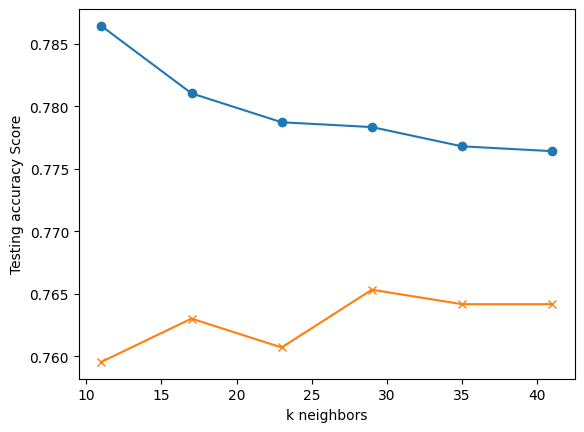

In [ ]:
# For loop to train the KNN model and get the testing score for male athletes in every Summer Olympic Sport


athlete_m = summer_data[(summer_data["Sport"] == 'Football') & (summer_data["Sex"] == "M")]
athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
# One-hot encoding                
athlete_m = athlete_m.replace("Gold", 1)
athlete_m = athlete_m.replace("Silver", 1)
athlete_m = athlete_m.replace("Bronze", 1)
athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
athlete_m = athlete_m.dropna()
athlete_m["Medal"].unique()
        
# Assign X (data) and y (target)        
X = athlete_m[['Height', "Weight", "Age"]] 
print(X.shape) 
y = athlete_m['Medal'] 
print(y.shape)


# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
# Create a StandardScater model and fit it to the training data 
X_scaler = StandardScaler().fit(X_train)
        
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
        
train_scores = []
test_scores = []
        
# Loop through different k values to see which has the highest accuracy
for k in range(11, 47, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

y_pred = knn.predict(X_test)
plt.plot(range(11, 47, 6), train_scores, marker='o')
plt.plot(range(11, 47, 6), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
       

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87       661
         1.0       0.00      0.00      0.00       204

    accuracy                           0.76       865
   macro avg       0.38      0.50      0.43       865
weighted avg       0.58      0.76      0.66       865



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


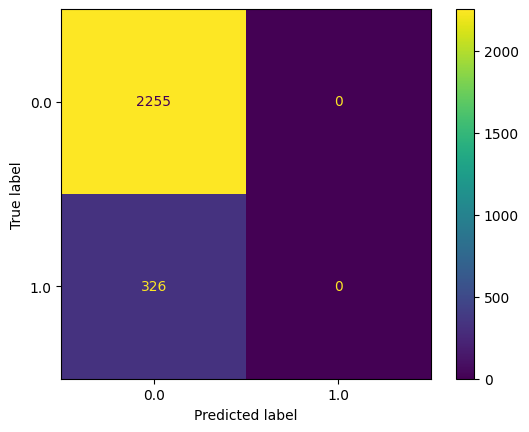

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

Swimming

(10321, 3)
(10321,)
k: 11, Train/Test Score: 0.877/0.871
k: 17, Train/Test Score: 0.875/0.870
k: 23, Train/Test Score: 0.873/0.873
k: 29, Train/Test Score: 0.872/0.873
k: 35, Train/Test Score: 0.872/0.873
k: 41, Train/Test Score: 0.872/0.873


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


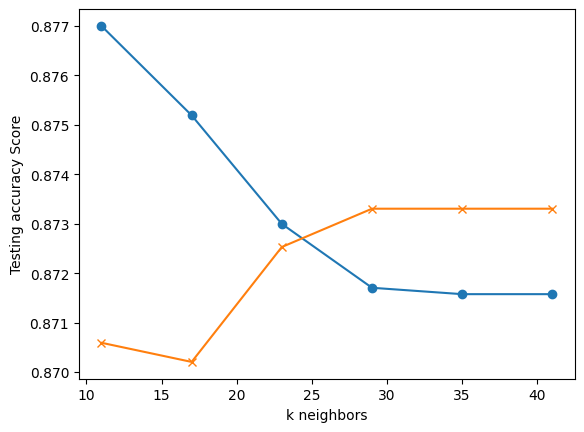

In [ ]:
# For loop to train the KNN model and get the testing score for male athletes in every Summer Olympic Sport


athlete_m = summer_data[(summer_data["Sport"] == 'Swimming') & (summer_data["Sex"] == "M")]
athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
# One-hot encoding                
athlete_m = athlete_m.replace("Gold", 1)
athlete_m = athlete_m.replace("Silver", 1)
athlete_m = athlete_m.replace("Bronze", 1)
athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
athlete_m = athlete_m.dropna()
athlete_m["Medal"].unique()
        
# Assign X (data) and y (target)        
X = athlete_m[['Height', "Weight", "Age"]] 
print(X.shape) 
y = athlete_m['Medal'] 
print(y.shape)


# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
# Create a StandardScater model and fit it to the training data 
X_scaler = StandardScaler().fit(X_train)
        
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
        
train_scores = []
test_scores = []
        
# Loop through different k values to see which has the highest accuracy
for k in range(11, 47, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

y_pred = knn.predict(X_test)
plt.plot(range(11, 47, 6), train_scores, marker='o')
plt.plot(range(11, 47, 6), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
       

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2255
         1.0       0.00      0.00      0.00       326

    accuracy                           0.87      2581
   macro avg       0.44      0.50      0.47      2581
weighted avg       0.76      0.87      0.81      2581



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


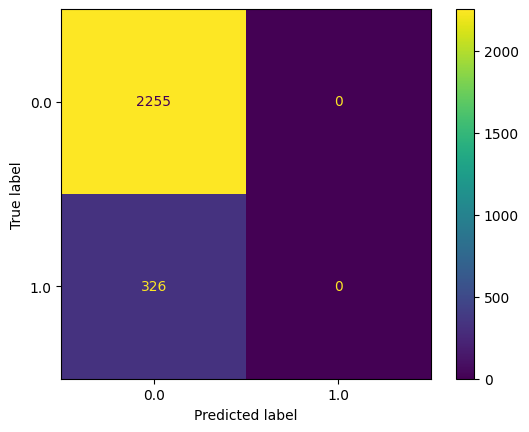

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()